In [16]:
import wntr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [17]:
inp_file='Net3.inp'

In [18]:
wn=wntr.network.WaterNetworkModel(inp_file)

In [19]:
wn.options.time.duration=24*3600
wn.options.time.hydraulic_timestep=3600
wn.options.time.report_timestep=3600

In [20]:
sim=wntr.sim.WNTRSimulator(wn)
results=sim.run_sim()

In [21]:
pump_flowrate=results.link['flowrate'].loc[:,wn.pump_name_list]

In [22]:
pump_heads={}
for pump_id in wn.pump_name_list:
    pump=wn.get_link(pump_id)
    start_node=pump.start_node
    end_node=pump.end_node
    headStartNode=results.node['head'][start_node.name]
    headEndNode=results.node['head'][end_node.name]
    pump_heads[pump_id]=headEndNode-headStartNode


In [23]:
pumpHeadDF=pd.DataFrame(pump_heads)

In [24]:
pumpHeadDF

,10,335
0,-6.546073,28.481457
3600,22.157711,28.738856
7200,22.668331,28.980178
10800,22.775435,29.093495
14400,23.563301,29.469093
18000,22.908924,-0.000689
21600,23.003004,-0.000678
25200,22.861605,-0.000675
28800,22.976115,-0.000670
32400,22.855489,-0.000684


In [25]:
pumpStatus=results.link['status'].loc[:,'10']

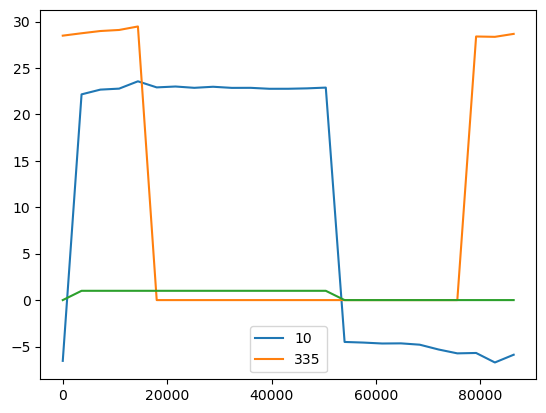

In [26]:

pumpHeadDF.plot()
plt.plot(pumpStatus)

In [27]:
# EFFECIENCY
# FLOW * HEAD /POWER
#Energy_usage=Flowrate*Head*9.81/Efficiency
pump_efficiency=0.75
energy_usage={}
for pump_id in wn.pump_name_list:
    flow_rate=results.link['flowrate'][pump_id]
    head=pumpHeadDF[pump_id]
    energy=(flow_rate*head*9.81)/pump_efficiency
    energy_usage[pump_id]=energy
energy_usage_df=pd.DataFrame(energy_usage)

In [28]:
energy_usage_df

,10,335
0,-0.000000,309.255381
3600,62.812536,309.777240
7200,62.296757,310.228171
10800,62.171235,310.427102
14400,61.053794,311.027861
18000,62.006157,-0.000000
21600,61.883992,-0.000000
25200,62.065777,-0.000000
28800,61.919403,-0.000000
32400,62.073394,-0.000000


Text(0.5, 1.0, 'Pump Energy Usage over time')

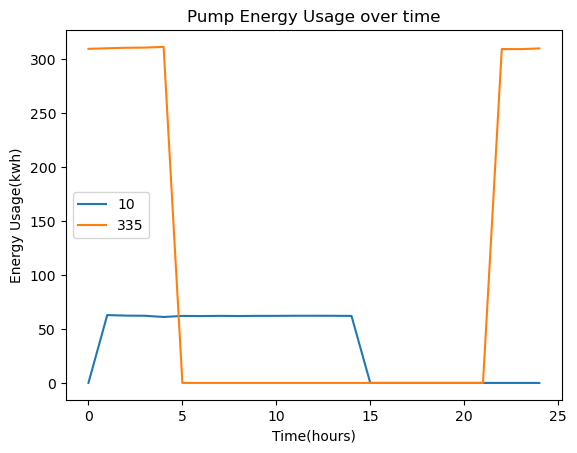

In [29]:
energy_usage_df.index=energy_usage_df.index/3600
energy_usage_df.plot()
plt.xlabel('Time(hours)')
plt.ylabel('Energy Usage(kwh)')
plt.title('Pump Energy Usage over time')

In [30]:
electricityCostperkwh=1.62 
totalEnergyCost=energy_usage_df.sum()*(1/3600)*electricityCostperkwh
print('Total Energy Cost for each pump:')
print(totalEnergyCost)

Total Energy Cost for each pump:
10     0.391006
335    1.115281
dtype: float64


Index([ 0.0,  1.0,  2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0,
       12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0,
       24.0],
      dtype='float64')